# XGBoost (Regresión)

Además de las operaciones básicas de limpieza de datos, existen algunos requisitos para que XGBoost logre el máximo rendimiento. Principalmente:

* Las características numéricas deben escalarse
* Las características categóricas deben codificarse

En primer lugar, al igual que con cualquier otro conjunto de datos, importaremos el conjunto de datos. En este caso es el de Vivienda de Boston y lo almacenaremos en una variable llamada boston.

Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación

from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.datasets import load_boston
boston = load_boston()

Vamos a ignorar los warnings que no son importantes para lo que vamos a hacer. **Nota** En caso de no tener instalado XGBoost descomente y ejecuta  la línea de comando de instalación.

In [2]:
import warnings
warnings.filterwarnings('ignore')

#pip install xgboost

## Entendimiento de los datos

Cargamos los datos para entenderlos

In [3]:
print(boston.data.shape)
print(boston.DESCR)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [4]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Resulta que este conjunto de datos tiene 14 columnas (incluida la variable de destino PRECIO) y 506 filas. Observe que las columnas son de tipo de datos flotantes, lo que indica la presencia de solo entidades continuas sin valores faltantes en ninguna de las columnas. 

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Notará que no hay una columna llamada PRECIO en el DataFrame. Esto se debe a que la columna de destino está disponible en otro atributo llamado boston.target. Agregue boston.target a su Pandas DataFrame.

In [7]:
data['PRICE'] = boston.target

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Separamos la variable de destino y el resto de las variables usando .iloc para crear subconjuntos de datos.

In [9]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]


Ahora, convertiremos el conjunto de datos en una estructura de datos optimizada llamada Dmatrix compatible con XGBoost y que le brinda su aclamado rendimiento  y ganancia de eficiencia.

In [10]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

Ahora, crearemos el conjunto de entrenamiento y prueba para la validación cruzada de los resultados utilizando la función train_test_split del módulo model_selection de sklearn con un tamaño de test_size igual al 20 % de los datos. Además, para mantener la reproducibilidad de los resultados, también se asigna un estado aleatorio.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

El siguiente paso es instanciar un objeto regresor XGBoost llamando a la clase XGBRegressor() de la biblioteca XGBoost con los hiperparámetros pasados como argumentos. Para problemas de clasificación, se habría utilizado la clase XGBClassifier().

In [12]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

Ajustamos el regresor al conjunto de entrenamiento y hacemos predicciones en el conjunto de prueba utilizando los métodos .fit() y .predict().

In [13]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[17:24:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Calculamos el rmse invocando la función mean_sqaured_error del módulo de métricas de sklearn.

In [14]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.517005


Crearemos un diccionario de hiperparámetros params que contiene todos los hiperparámetros y sus valores como pares clave-valor, pero excluiremos los n_estimadores del diccionario de hiperparámetros porque usarrmod num_boost_rounds en su lugar.

Utilizarrmos estos parámetros para crear un modelo de validación cruzada de 3, invocando el método cv() de XGBoost y almacenaremod los resultados en un dataframe cv_results. Tenga en cuenta que aquí está utilizando el objeto Dmatrix que creó anteriormente.

In [15]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[17:24:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680256,0.025606,21.719121,0.019025
1,19.740499,0.072068,19.818880,0.061770
2,18.007202,0.119745,18.109862,0.129375
3,16.463925,0.115086,16.587236,0.182339
4,14.990313,0.112001,15.132977,0.166282


In [17]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.862102
Name: test-rmse-mean, dtype: float64


Puede ver que su RMSE para la predicción de precios se ha reducido en comparación a la última  y resultó ser de alrededor de 3,86 por $1000 $. Puede alcanzar un RMSE aún más bajo para un conjunto diferente de hiperparámetros. Puede considerar aplicar técnicas como Grid Search, Random Search y Bayesian Optimization para alcanzar el conjunto óptimo de hiperparámetros.

**Visualización de árboles de XGBoost y la importancia de sus atributos**

Podemos visualizar árboles individuales del modelo totalmente potenciado que crea XGBoost utilizando todo el conjunto de datos de viviendas. XGBoost tiene una función plot_tree() que facilita este tipo de visualización. Una vez que entrena un modelo usando la API de aprendizaje XGBoost, puede pasarlo a la función plot_tree() junto con la cantidad de árboles que desea trazar usando el argumento num_trees.

In [18]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:24:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


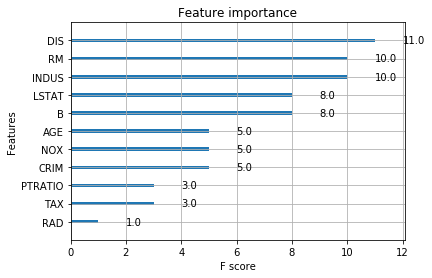

In [19]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


# Clasificación a partir de un ensamble extremo: XGBoost

Entrenaremos y construiremos nuestro modelo utilizando un conjunto de datos de clientes de supermercado.

In [20]:
df = pd.read_csv("10-01-ComprasClientes.csv")

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [23]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

No hay valores faltante. Ahora definimos la matriz de atributos y el vector de la variable objetivo.

In [24]:
X = df.drop('Channel', axis=1)

y = df['Channel']

In [25]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [26]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

Podemos ver que las etiquetas y contienen valores como 1 y 2. Tendrmos que convertirlos en 0 y 1 para un análisis más detallado. Lo haremos de la siguiente manera

In [27]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [28]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

Ahora, convertiremos el conjunto de datos en una estructura de datos optimizada llamada Dmatrix que admite XGBoost y le brinda su aclamado rendimiento y ganancias de eficiencia.

In [29]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [30]:
xgb_classifier = xgb.XGBClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Dividimos los datos en conjuntos de prueba y entrenamiento. Luego con estos datos entrenaremos el clasificador XGBoost

In [32]:
# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
                      
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, ...)

Haremos ahora las predicciones con XGBoost y calcularemos su exactitud.

In [33]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [34]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8864


## Evaluación del modelo

Como antes podemos usar ciertos parámetros para construir un modelo de validación cruzada, llamando al método CV() de XGBoost.

In [35]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

Con el árbol completo, obtuvimos un nivel de accuracy del 61.68%, cuando el baseline era de 50.74%.

In [36]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.943394,0.006175,0.939301,0.010420
1,0.956169,0.010158,0.948217,0.008694
2,0.957925,0.008354,0.950256,0.012729
3,0.963100,0.005174,0.948043,0.014022
4,0.964848,0.004909,0.952190,0.015712


Finalmente presentamos aquí también la importancia de las variables independientes

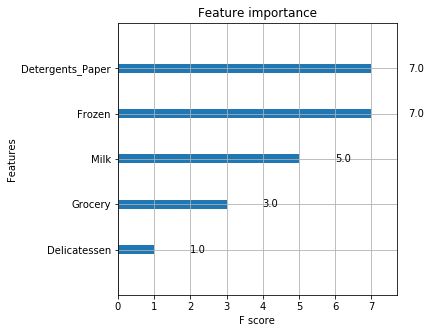

In [37]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()